# Notebook de análisis de datos sobre las causas de muerte a nivel mundial

Desarrollado por: Frederick Salazar <br>
Fecha: Diciembre de 2022 <br>
Fuente de datos: https://www.kaggle.com/datasets/madhurpant/world-deaths-and-causes-1990-2019


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_data = pd.read_csv('./data/annual_deaths_by_causes.csv', sep=',')

In [3]:
df_data.columns

Index(['country', 'code', 'year', 'meningitis', 'alzheimer's_diesease',
       'parkinson's_disease', 'nutritional_deficiency', 'malaria', 'drowning',
       'interpersonal_violence', 'maternal_disorders', 'hiv/aids',
       'drug_use_disorders', 'tuberculosis', 'cardiovascular_diseases',
       'lower_respiratory_infections', 'neonatal_disorders',
       'alcohol_use_disorders', 'self_harm', 'exposure_to_forces_of_nature',
       'diarrheal_diseases', 'environmental_heat_and_cold_exposure',
       'neoplasms', 'conflict_and_terrorism', 'diabetes_mellitus',
       'chronic_kidney_disease', 'poisonings', 'protein_energy_malnutrition',
       'terrorism', 'road_injuries', 'chronic_respiratory_diseases',
       'chronic_liver_diseases', 'digestive_diseases',
       'fire_heat_hot_substance', 'acute_hepatitis'],
      dtype='object')

In [4]:
#vamos a renombrar las columnas a español

colmuns_name = ['pais',
                'codigo',
                'año',
                'por_meningitis',
                'por_alzheimer',
                'por_parkinson',
                'por_deficiencia_nutricional',
                'por_malaria',
                'por_ahogo',
                'por_violencia_interpersonal',
                'por_trastornos_maternos',
                'por_vih_sida',
                'por_uso_drogas',
                'por_tuberculosis',
                'por_enfermedades_cardiovasculares',
                'por_infecciones_respiratorias_leves',
                'por_trastornos_neonatales',
                'por_uso_alcohol',
                'por_autolesiones',
                'por_fuerzas_de_la_naturaleza',
                'por_enfermedades__diarreicas',
                'por_exposicion_al_calor_o_frio',
                'por_neoplasias',
                'por_guerras_terrorismo',
                'por_diabetes_mellitus',
                'por_enfermerdad_renal_cronica',
                'por_envenenamiento',
                'por_desnutricion',
                'por_terrorismo',
                'por_accidentes_de_transito',
                'por_enfermerdades_respirtatorias_cronicas',
                'por_enfermedades_linfaticas_cronicas',
                'por_enfermedades_digestivas',
                'por_sustancias_de_calor_fuego',
                'por_hepatitis_aguda'
                ]

df_causas_muertes = df_data
df_causas_muertes.columns = colmuns_name

In [5]:
df_causas_muertes.head()

,pais,codigo,año,por_meningitis,por_alzheimer,por_parkinson,por_deficiencia_nutricional,por_malaria,por_ahogo,por_violencia_interpersonal,...,por_enfermerdad_renal_cronica,por_envenenamiento,por_desnutricion,por_terrorismo,por_accidentes_de_transito,por_enfermerdades_respirtatorias_cronicas,por_enfermedades_linfaticas_cronicas,por_enfermedades_digestivas,por_sustancias_de_calor_fuego,por_hepatitis_aguda
0,Afghanistan,AFG,2007,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,...,4490.0,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,2731.0,1424.0,455.0,2277.0,255.0,1973.0,3785.0,...,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,2460.0,1449.0,460.0,2040.0,239.0,1852.0,3874.0,...,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2327.0,1508.0,473.0,1846.0,390.0,1775.0,4170.0,...,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,2254.0,1544.0,482.0,1705.0,94.0,1716.0,4245.0,...,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0


In [6]:
#Identificar valores nullos

df_causas_muertes.describe()

,año,por_meningitis,por_alzheimer,por_parkinson,por_deficiencia_nutricional,por_malaria,por_ahogo,por_violencia_interpersonal,por_trastornos_maternos,por_vih_sida,...,por_enfermerdad_renal_cronica,por_envenenamiento,por_desnutricion,por_terrorismo,por_accidentes_de_transito,por_enfermerdades_respirtatorias_cronicas,por_enfermedades_linfaticas_cronicas,por_enfermedades_digestivas,por_sustancias_de_calor_fuego,por_hepatitis_aguda
count,7273.000000,6840.000000,6.840000e+03,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6.840000e+03,...,6.840000e+03,6840.000000,6840.000000,2891.000000,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6840.000000,6840.000000
mean,2004.425134,8213.149561,2.736319e+04,6493.627339,11006.353947,18903.160234,8619.055117,10636.648684,6131.066959,2.814125e+04,...,2.506893e+04,2145.455848,9531.528801,349.235905,3.063496e+04,9.130390e+04,3.189892e+04,5.652551e+04,3006.043275,3112.066520
std,8.623572,34982.933895,1.113146e+05,25767.447063,48289.687100,97346.780570,35879.406010,40888.793762,26355.210370,1.391973e+05,...,9.600839e+04,8433.507625,41689.675155,1917.143788,1.166999e+05,3.772013e+05,1.194387e+05,2.109884e+05,11211.885249,14440.219516
min,1990.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1997.000000,19.000000,1.287500e+02,37.000000,11.000000,0.000000,39.000000,48.000000,6.000000,1.400000e+01,...,2.140000e+02,8.000000,6.000000,0.000000,2.077500e+02,3.685000e+02,2.047500e+02,4.000000e+02,21.000000,2.000000
50%,2004.000000,150.500000,8.455000e+02,209.000000,159.000000,0.000000,253.000000,342.000000,70.500000,1.870000e+02,...,1.080000e+03,72.000000,120.000000,5.000000,1.239500e+03,2.104000e+03,1.541000e+03,2.778500e+03,152.000000,21.500000
75%,2012.000000,1622.250000,4.251000e+03,984.000000,2204.000000,1017.250000,1014.250000,1391.250000,1244.500000,3.836500e+03,...,4.497500e+03,371.000000,2120.000000,60.000000,5.786250e+03,9.013250e+03,5.670500e+03,9.594000e+03,593.250000,264.000000
max,2019.000000,432524.000000,1.623276e+06,362907.000000,757152.000000,961129.000000,460665.000000,463129.000000,302586.000000,1.844490e+06,...,1.427232e+06,92101.000000,656314.000000,44490.000000,1.285039e+06,3.974315e+06,1.472012e+06,2.557689e+06,129705.000000,166405.000000


# Enfermedades de interes de análisis

A continuación vamos a seleccionar las enfermedades que son de interes de análisis bajo el contexto mundial pero en comparativa con el contexto de Colombia, la forma de análisis será un análisis descriptivo teniendo en cuenta datos mundiales pero enfocandonos en Colombia.<br><br>
Enfermedades de interes <br>
- malaria
- vih sida
- uso de drogas
- uso de alcohol
- enfermedades diarreicas
- por diabetes
- desnutricion


In [7]:
df_data_analisis = df_causas_muertes[['pais',
                                      'codigo',
                                      'año',
                                      'por_malaria',
                                      'por_vih_sida',
                                      'por_uso_drogas',
                                      'por_uso_alcohol',
                                      'por_enfermedades__diarreicas',
                                      'por_diabetes_mellitus',
                                      'por_desnutricion']]

df_data_analisis.head()

,pais,codigo,año,por_malaria,por_vih_sida,por_uso_drogas,por_uso_alcohol,por_enfermedades__diarreicas,por_diabetes_mellitus,por_desnutricion
0,Afghanistan,AFG,2007,393.0,148.0,252.0,111.0,9320.0,3189.0,2439.0
1,Afghanistan,AFG,2008,255.0,157.0,261.0,114.0,8275.0,3261.0,2231.0
2,Afghanistan,AFG,2009,239.0,167.0,270.0,115.0,7359.0,3336.0,1998.0
3,Afghanistan,AFG,2011,390.0,184.0,292.0,120.0,6412.0,3550.0,1805.0
4,Afghanistan,AFG,2012,94.0,191.0,305.0,124.0,6008.0,3682.0,1667.0


In [8]:
df_data_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pais                          7273 non-null   object 
 1   codigo                        6206 non-null   object 
 2   año                           7273 non-null   int64  
 3   por_malaria                   6840 non-null   float64
 4   por_vih_sida                  6840 non-null   float64
 5   por_uso_drogas                6840 non-null   float64
 6   por_uso_alcohol               6840 non-null   float64
 7   por_enfermedades__diarreicas  6840 non-null   float64
 8   por_diabetes_mellitus         6840 non-null   float64
 9   por_desnutricion              6840 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 568.3+ KB


# Análisis muertes por uso de drogas a nivel mundial

In [9]:
#Ahora vamos a crear un Df por cada una de las enfermedades para iniciar su analisis

df_drogas_por_pais = df_data_analisis[['pais',
                                       'año',
                                       'por_uso_drogas']]

#Creamos un df de muertes por uso de drogas por algunas regiones del mundo
df_drogas_x_region = df_drogas_por_pais[df_drogas_por_pais['pais'].isin(['North America (WB)',
                                                                         'East Asia & Pacific (WB)',
                                                                         'European Region (WHO)',
                                                                         'Europe & Central Asia (WB)',
                                                                         'South-East Asia Region (WHO)',
                                                                         'South Asia (WB)',
                                                                         'Middle East & North Africa (WB)',
                                                                         'Latin America & Caribbean (WB)',
                                                                         'African Region (WHO)',
                                                                         'Sub-Saharan Africa (WB)'])]

#Eliminamos del df organizaciones que no son paises
df_drogas_por_pais = df_drogas_por_pais[~df_drogas_por_pais['pais'].isin(['World',
                                                                          'G20',
                                                                          'World Bank High Income',
                                                                          'OECD Countries',
                                                                          'World Bank Upper Middle Income',
                                                                          'Region of the Americas (WHO)',
                                                                          'North America (WB)',
                                                                          'East Asia & Pacific (WB)',
                                                                          'Western Pacific Region (WHO)',
                                                                          'European Region (WHO)',
                                                                          'Europe & Central Asia (WB)',
                                                                          'World Bank Lower Middle Income',
                                                                          'South-East Asia Region (WHO)',
                                                                          'South Asia (WB)',
                                                                          'Eastern Mediterranean Region (WHO)',
                                                                          'Middle East & North Africa (WB)',
                                                                          'Latin America & Caribbean (WB)',
                                                                          'African Region (WHO)',
                                                                          'Sub-Saharan Africa (WB)',
                                                                          'World Bank Low Income',
                                                                          'World (excluding China)'])]

#obtenemos un df con el total de muertes por drogas a nivel mundial por año
df_muertes_drogas_x_año = df_drogas_por_pais.groupby(['año'])[['por_uso_drogas']].sum().reset_index()

#obtememos un df con total de muertes por drogas por pais.
df_muertes_drogas_x_pais = df_drogas_por_pais.groupby(['pais'])[['por_uso_drogas']].sum().reset_index()\
                                             .sort_values('por_uso_drogas', ascending=False)


In [10]:
df_drogas_por_pais.head()

,pais,año,por_uso_drogas
0,Afghanistan,2007,252.0
1,Afghanistan,2008,261.0
2,Afghanistan,2009,270.0
3,Afghanistan,2011,292.0
4,Afghanistan,2012,305.0


In [11]:
df_drogas_x_region.head()

,pais,año,por_uso_drogas
30,African Region (WHO),1990,1068.0
31,African Region (WHO),1991,1121.0
32,African Region (WHO),1992,1199.0
33,African Region (WHO),1993,1225.0
34,African Region (WHO),1994,1290.0


In [12]:
df_muertes_drogas_x_año.head(10)

,año,por_uso_drogas
0,1990,57001.0
1,1991,62802.0
2,1992,67796.0
3,1993,72638.0
4,1994,77857.0
5,1995,81237.0
6,1996,83097.0
7,1997,84125.0
8,1998,86832.0
9,1999,89251.0


In [13]:
df_muertes_drogas_x_pais.head(20)

,pais,por_uso_drogas
223,United States,800798.0
41,China,626914.0
171,Russia,259452.0
95,India,168928.0
98,Iran,76171.0
222,United Kingdom,60456.0
65,England,47103.0
220,Ukraine,45328.0
79,Germany,43072.0
34,Canada,37251.0


In [14]:
df_muertes_drogas_x_pais[df_muertes_drogas_x_pais['pais'] == 'Colombia']

,pais,por_uso_drogas
42,Colombia,2889.0


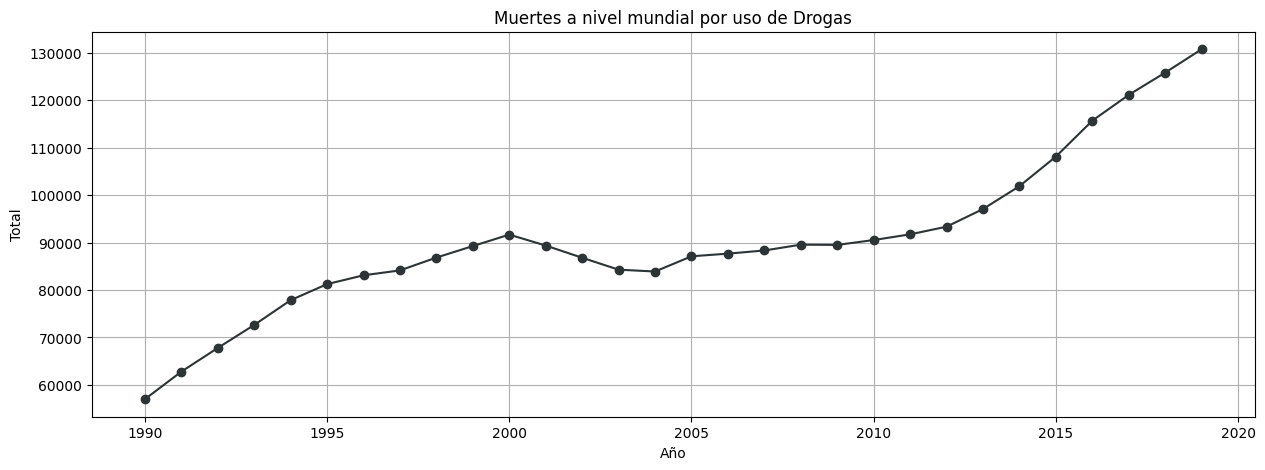

In [15]:
#graficamos el total de muertes por año a nivel mundial
plt.figure(figsize=(15,5))

plt.plot(df_muertes_drogas_x_año['año'],
         df_muertes_drogas_x_año['por_uso_drogas'],
         marker='o',
         color = '#2d3436')

plt.xlabel('Año')
plt.ylabel('Total')
plt.grid()
plt.title('Muertes a nivel mundial por uso de Drogas')

plt.show()

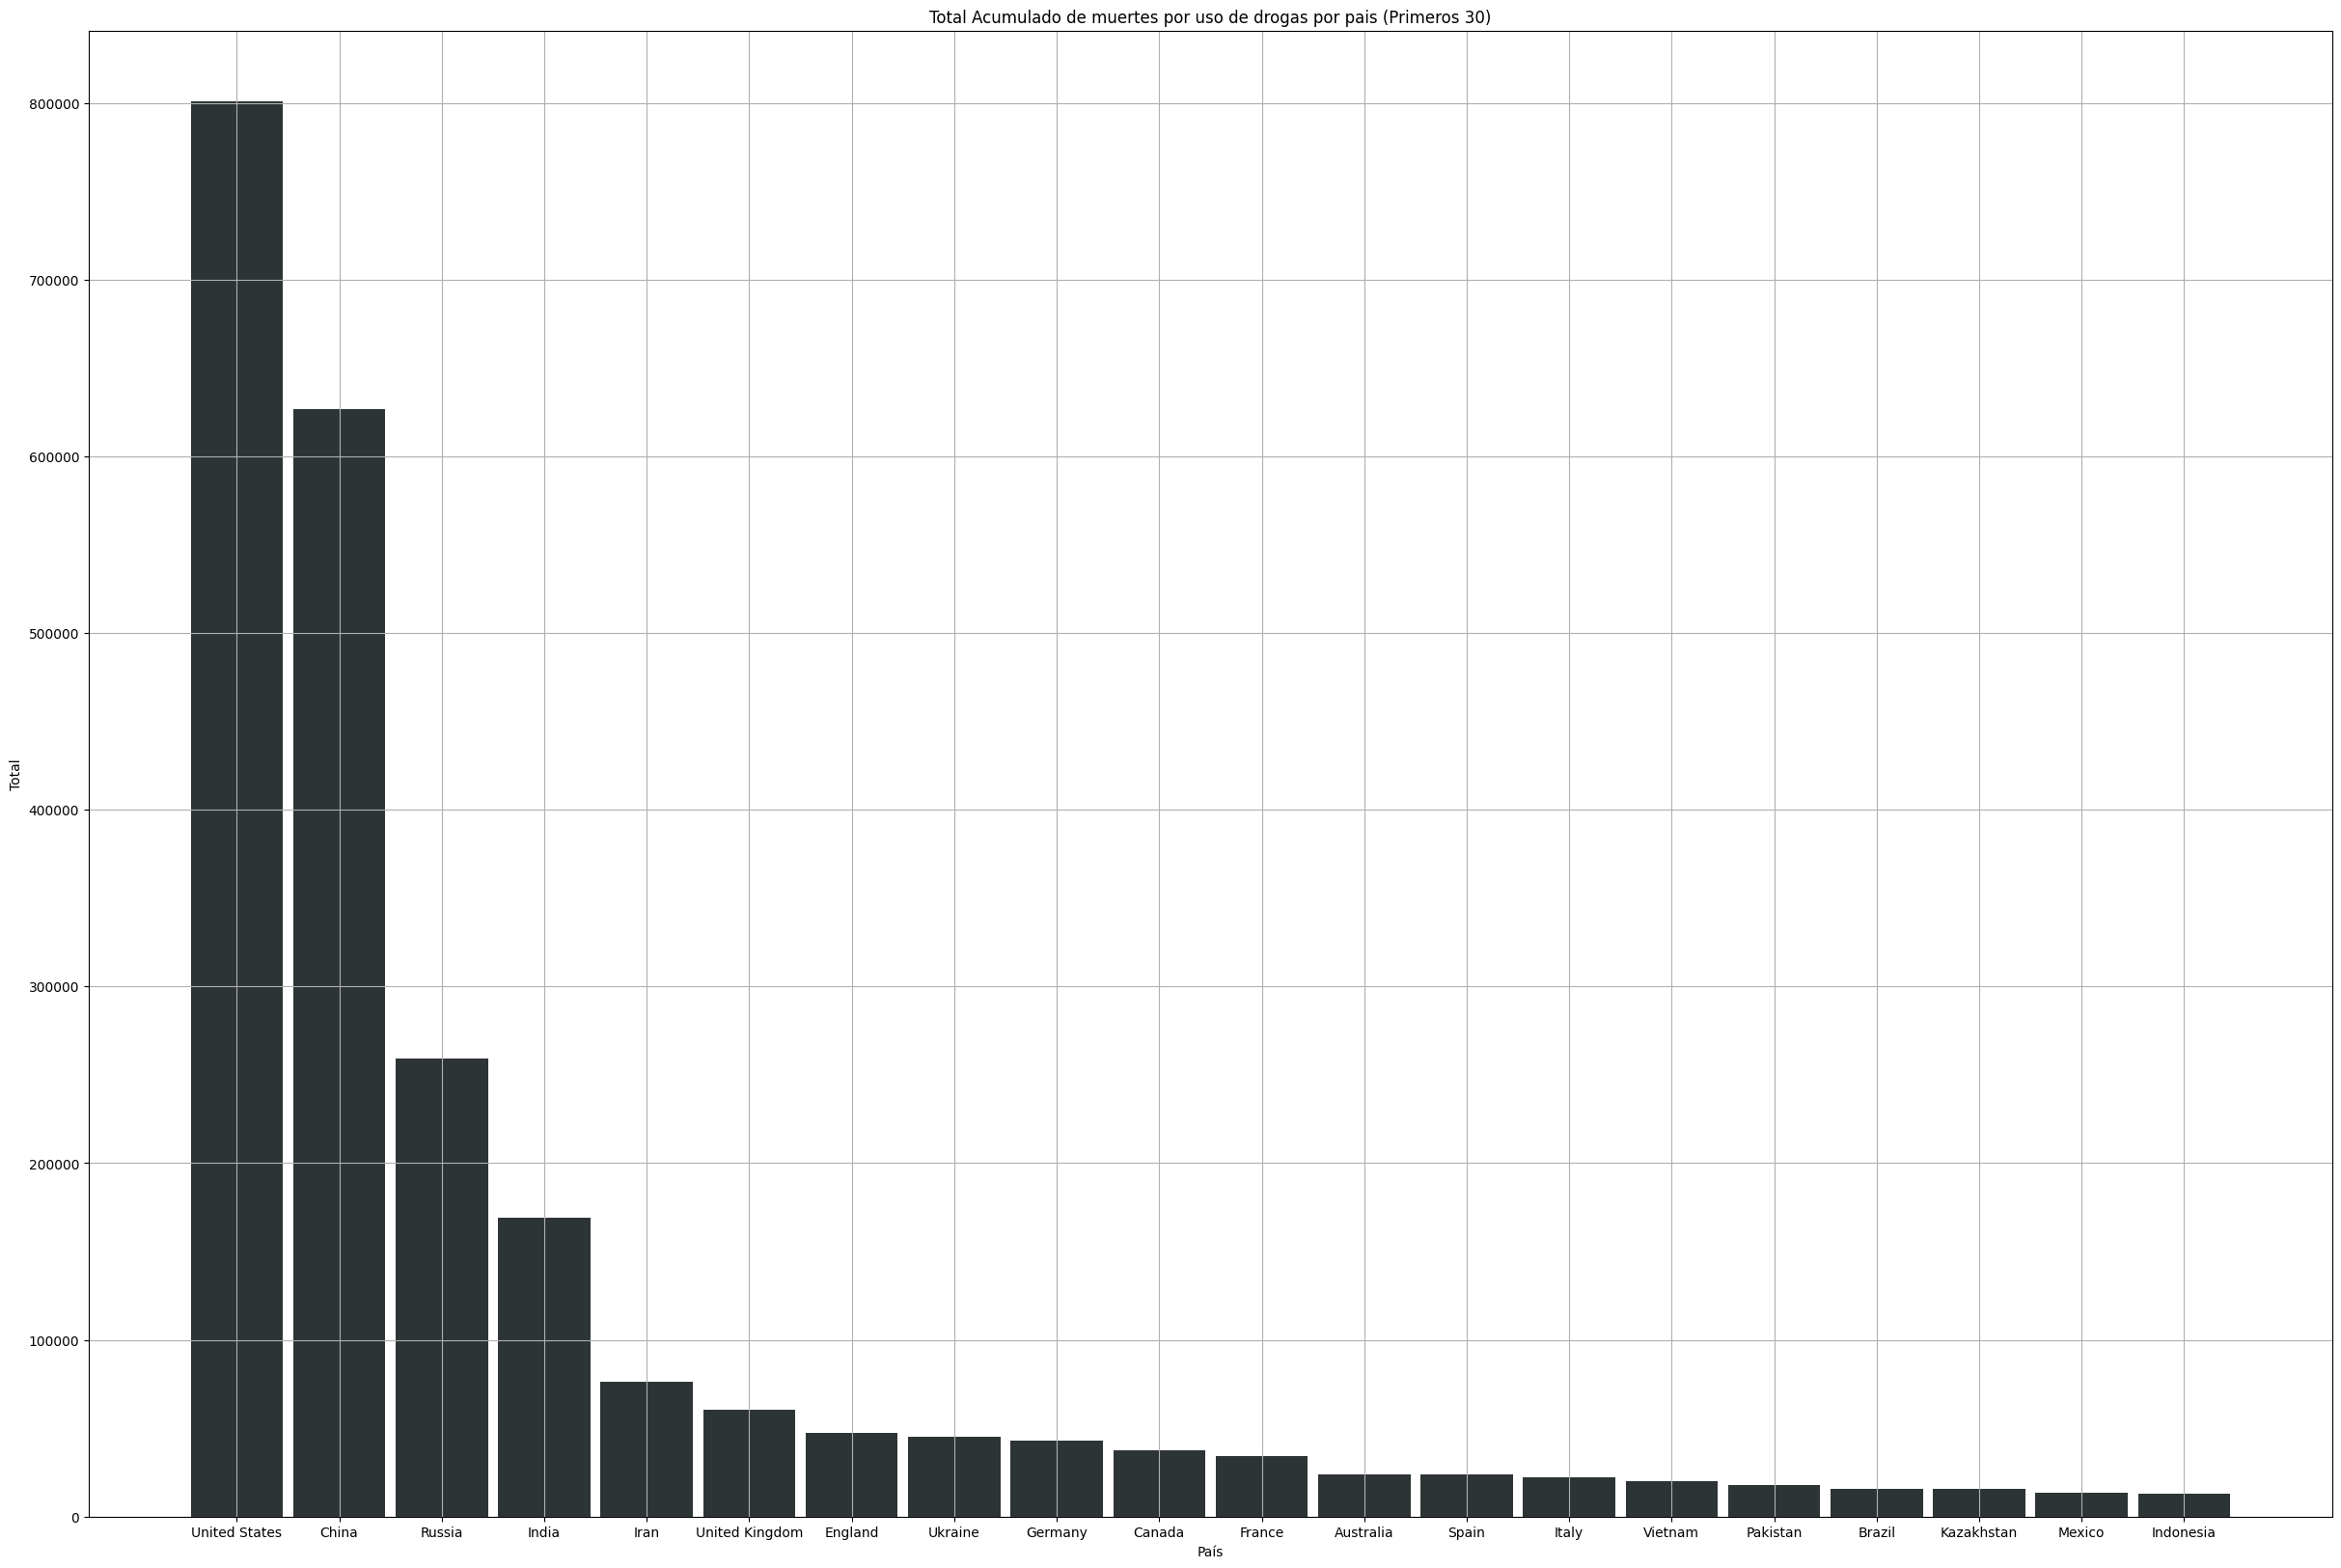

In [16]:
plt.figure(figsize=(30,20))

#creamos df con los primeros 20 paises con mas muertes por uso de drogas a nivel mundial

df_top_10_muertes_x_drogas_x_pais = df_muertes_drogas_x_pais.head(20)

plt.bar(x=df_top_10_muertes_x_drogas_x_pais['pais'],
        height=df_top_10_muertes_x_drogas_x_pais['por_uso_drogas'],
        width=0.9,
        color = '#2d3436')

plt.title('Total Acumulado de muertes por uso de drogas por pais (Primeros 30)')
plt.xlabel('País')
plt.ylabel('Total')
plt.grid()

plt.show()

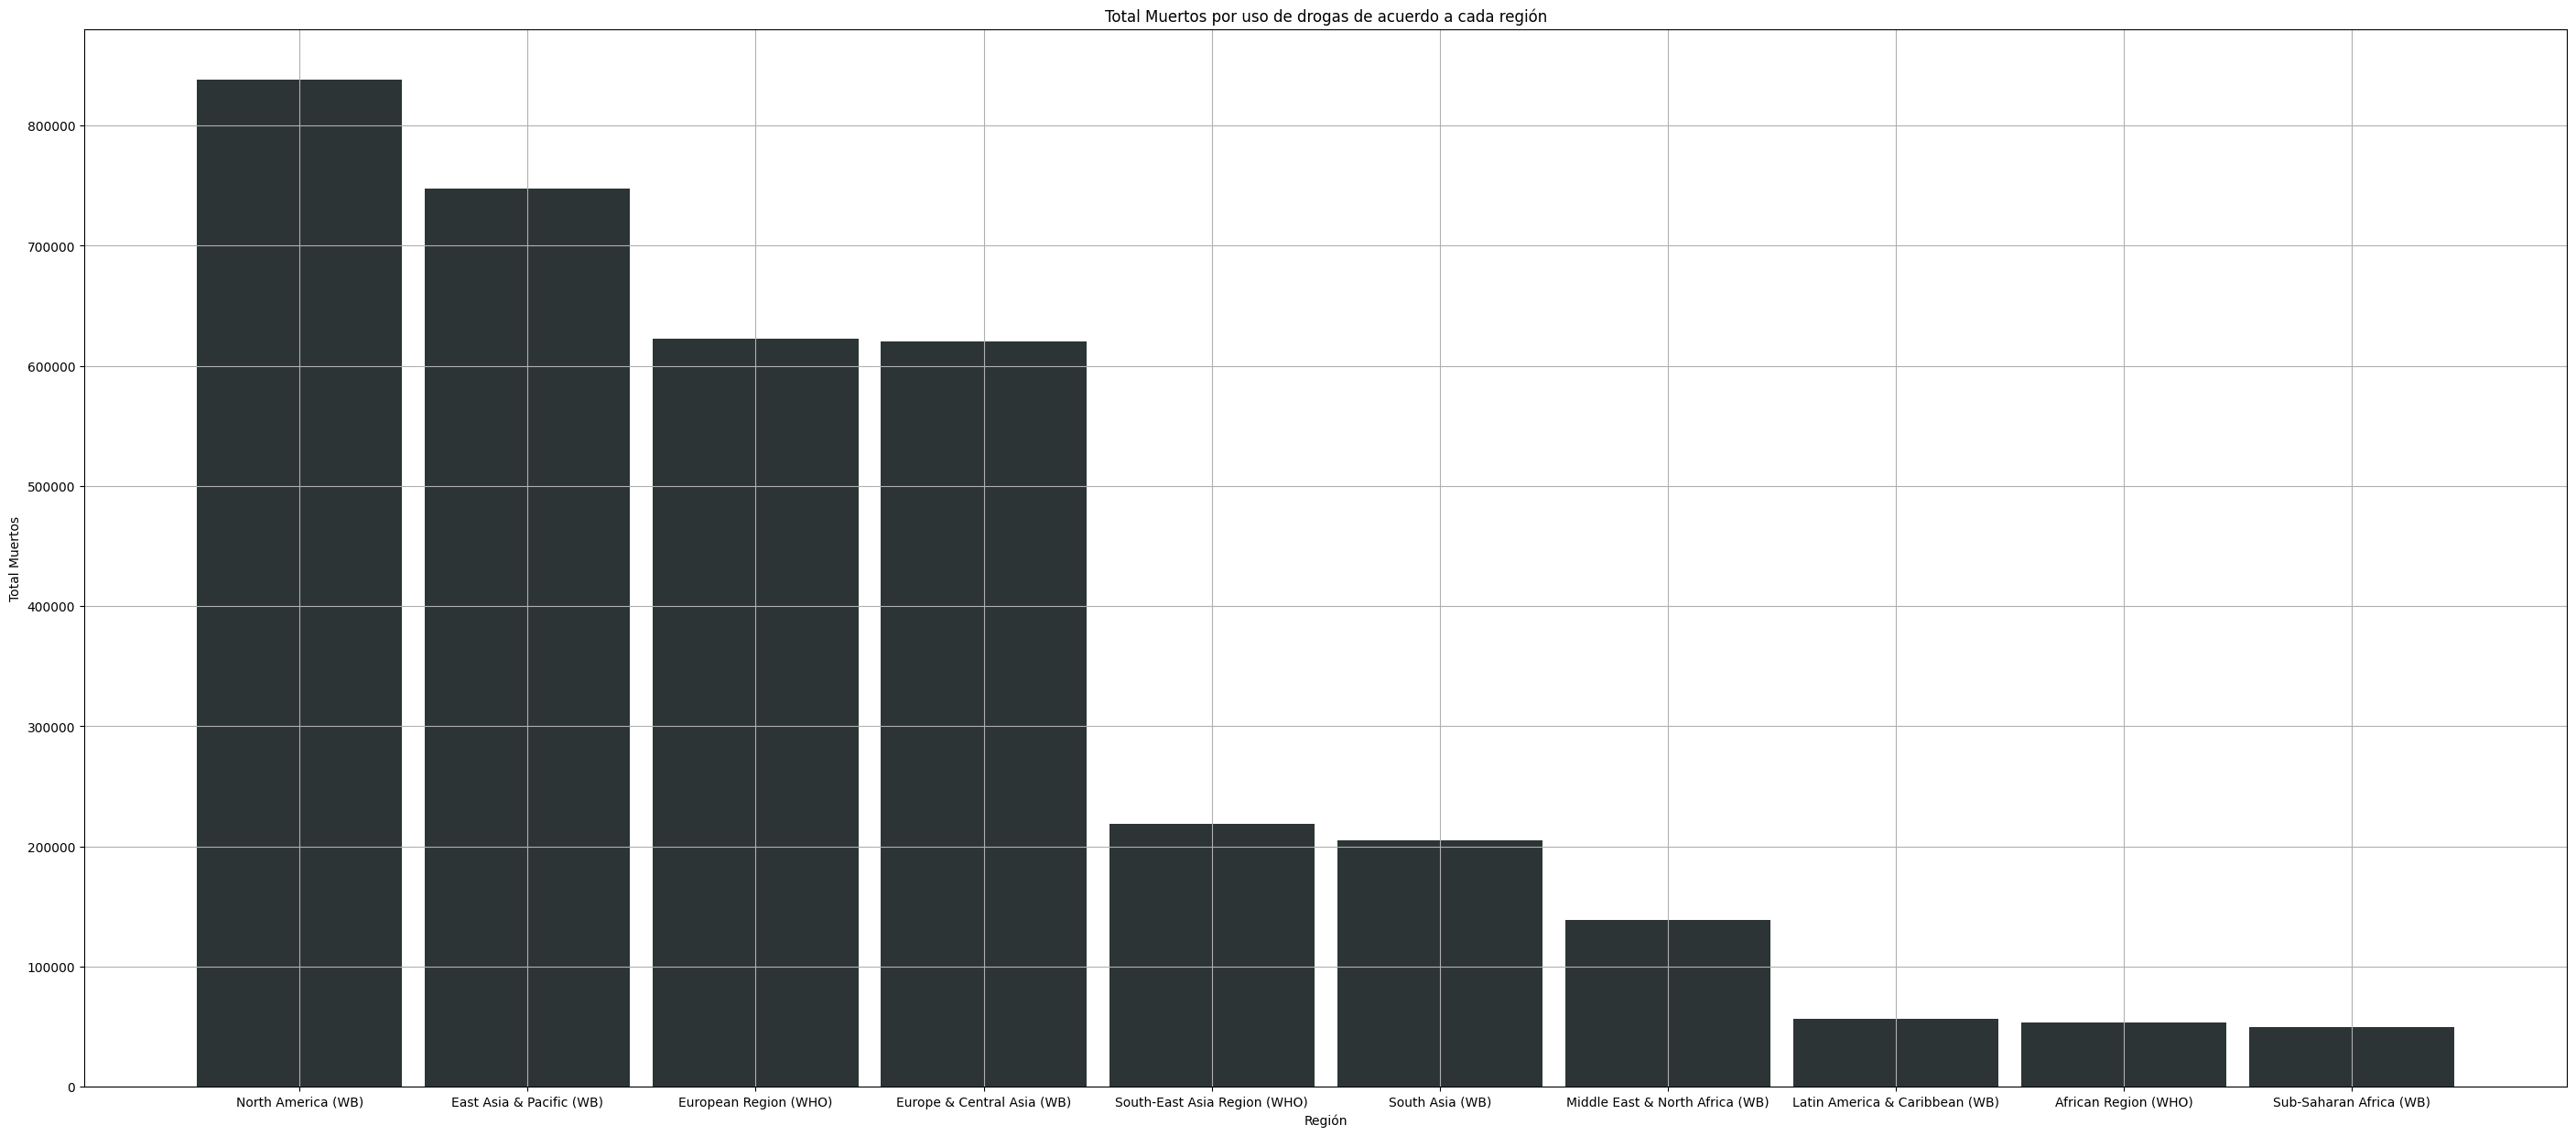

In [17]:
df_muertes_drogas_x_region = df_drogas_x_region.groupby('pais')['por_uso_drogas'].sum()\
                                               .reset_index()\
                                               .sort_values('por_uso_drogas', ascending=False)

plt.figure(figsize=(35,15))
plt.xlabel('Región')
plt.ylabel('Total Muertos')
plt.title('Total Muertos por uso de drogas de acuerdo a cada región')
plt.grid()

plt.bar(x=df_muertes_drogas_x_region['pais'],
        height=df_muertes_drogas_x_region['por_uso_drogas'],
        width=0.9,
        color = '#2d3436')

plt.show()


In [18]:
df_drogas_x_region

,pais,año,por_uso_drogas
30,African Region (WHO),1990,1068.0
31,African Region (WHO),1991,1121.0
32,African Region (WHO),1992,1199.0
33,African Region (WHO),1993,1225.0
34,African Region (WHO),1994,1290.0
...,...,...,...
6037,Sub-Saharan Africa (WB),2015,2166.0
6038,Sub-Saharan Africa (WB),2016,2262.0
6039,Sub-Saharan Africa (WB),2017,2367.0
6040,Sub-Saharan Africa (WB),2018,2478.0


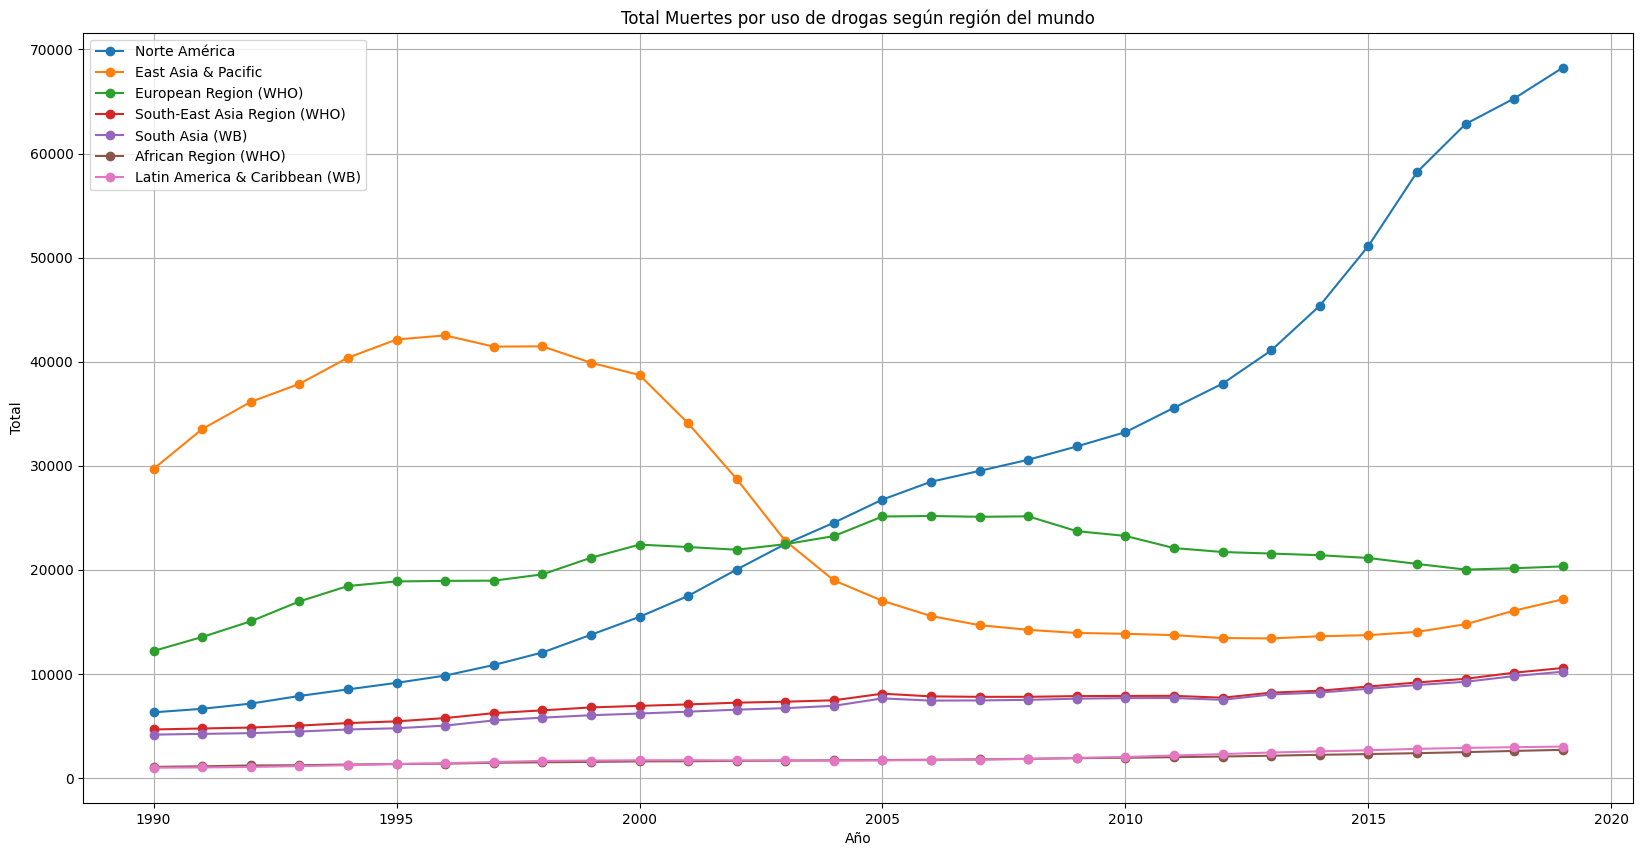

In [19]:
#Vamos ver la evolución de las muertes por uso de drogas por región a través del tiempo

plt.figure(figsize=(20,10))
plt.xlabel('Año')
plt.ylabel('Total')
plt.title('Total Muertes por uso de drogas según región del mundo')
plt.grid()

plt.plot(df_drogas_x_region[df_drogas_x_region['pais'] == 'North America (WB)']['año'],
         df_drogas_x_region[df_drogas_x_region['pais'] == 'North America (WB)']['por_uso_drogas'],
         marker='o',
         label='Norte América')

plt.plot(df_drogas_x_region[df_drogas_x_region['pais'] == 'East Asia & Pacific (WB)']['año'],
         df_drogas_x_region[df_drogas_x_region['pais'] == 'East Asia & Pacific (WB)']['por_uso_drogas'],
         marker='o',
         label='East Asia & Pacific')

plt.plot(df_drogas_x_region[df_drogas_x_region['pais'] == 'European Region (WHO)']['año'],
         df_drogas_x_region[df_drogas_x_region['pais'] == 'European Region (WHO)']['por_uso_drogas'],
         marker='o',
         label='European Region (WHO)')

plt.plot(df_drogas_x_region[df_drogas_x_region['pais'] == 'South-East Asia Region (WHO)']['año'],
         df_drogas_x_region[df_drogas_x_region['pais'] == 'South-East Asia Region (WHO)']['por_uso_drogas'],
         marker='o',
         label='South-East Asia Region (WHO)')

plt.plot(df_drogas_x_region[df_drogas_x_region['pais'] == 'South Asia (WB)']['año'],
         df_drogas_x_region[df_drogas_x_region['pais'] == 'South Asia (WB)']['por_uso_drogas'],
         marker='o',
         label='South Asia (WB)')

plt.plot(df_drogas_x_region[df_drogas_x_region['pais'] == 'African Region (WHO)']['año'],
         df_drogas_x_region[df_drogas_x_region['pais'] == 'African Region (WHO)']['por_uso_drogas'],
         marker='o',
         label='African Region (WHO)')

plt.plot(df_drogas_x_region[df_drogas_x_region['pais'] == 'Latin America & Caribbean (WB)']['año'],
         df_drogas_x_region[df_drogas_x_region['pais'] == 'Latin America & Caribbean (WB)']['por_uso_drogas'],
         marker='o',
         label='Latin America & Caribbean (WB)')

plt.legend()
plt.show()

In [20]:
#crearemos un df con las muertes por drogas en los paises de America del sur

df_muertes_drogas_x_sa = df_drogas_por_pais[df_drogas_por_pais['pais'].isin(['Colombia',
                                                                             'Venezuela',
                                                                             'Ecuador',
                                                                             'Peru',
                                                                             'Bolivia',
                                                                             'Chile',
                                                                             'Argentina',
                                                                             'Brazil',
                                                                             'Uruguay',
                                                                             'Paraguay'])]

In [21]:
df_muertes_drogas_x_sa

,pais,año,por_uso_drogas
240,Argentina,1990,22.0
241,Argentina,1991,24.0
242,Argentina,1992,25.0
243,Argentina,1993,27.0
244,Argentina,1994,28.0
...,...,...,...
6879,Venezuela,2015,102.0
6880,Venezuela,2016,96.0
6881,Venezuela,2017,93.0
6882,Venezuela,2018,92.0


In [22]:
#Total muertes por uso de drogas en sur america
df_muertos_drogas_x_sa_pais = df_muertes_drogas_x_sa.groupby('pais')['por_uso_drogas'].sum()\
                                                    .reset_index()\
                                                    .sort_values(['por_uso_drogas'], ascending=False)


<BarContainer object of 10 artists>

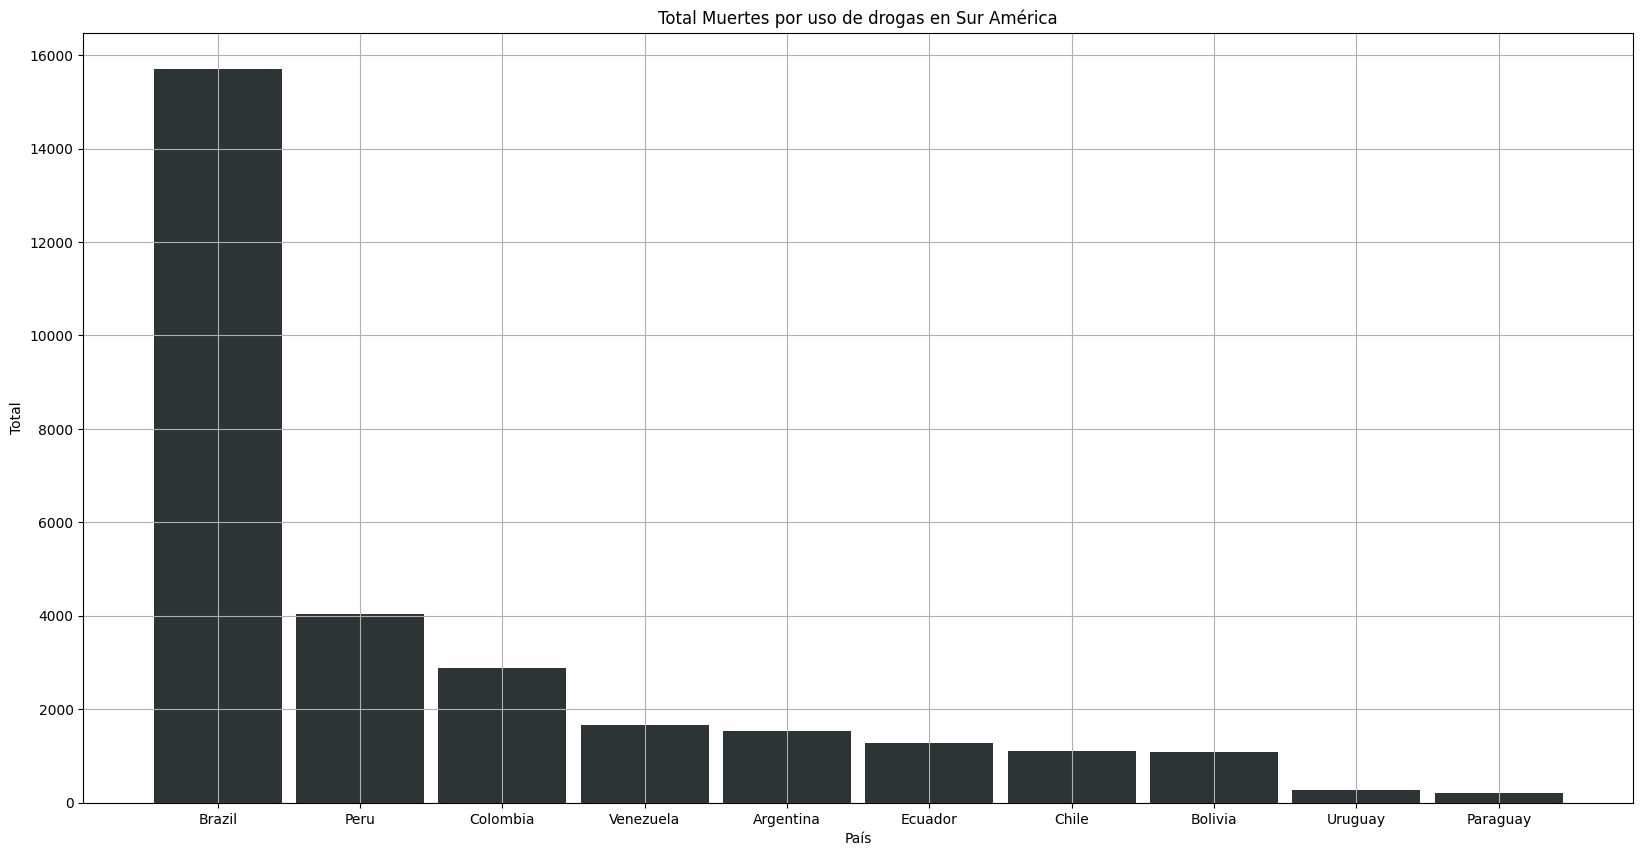

In [23]:
#Total muertes por uso de drogas en sur america

plt.figure(figsize=(20,10))
plt.xlabel('País')
plt.ylabel('Total')
plt.title('Total Muertes por uso de drogas en Sur América')
plt.grid()

plt.bar(x=df_muertos_drogas_x_sa_pais['pais'],
        height=df_muertos_drogas_x_sa_pais['por_uso_drogas'],
        width=0.9,
        color = '#2d3436')

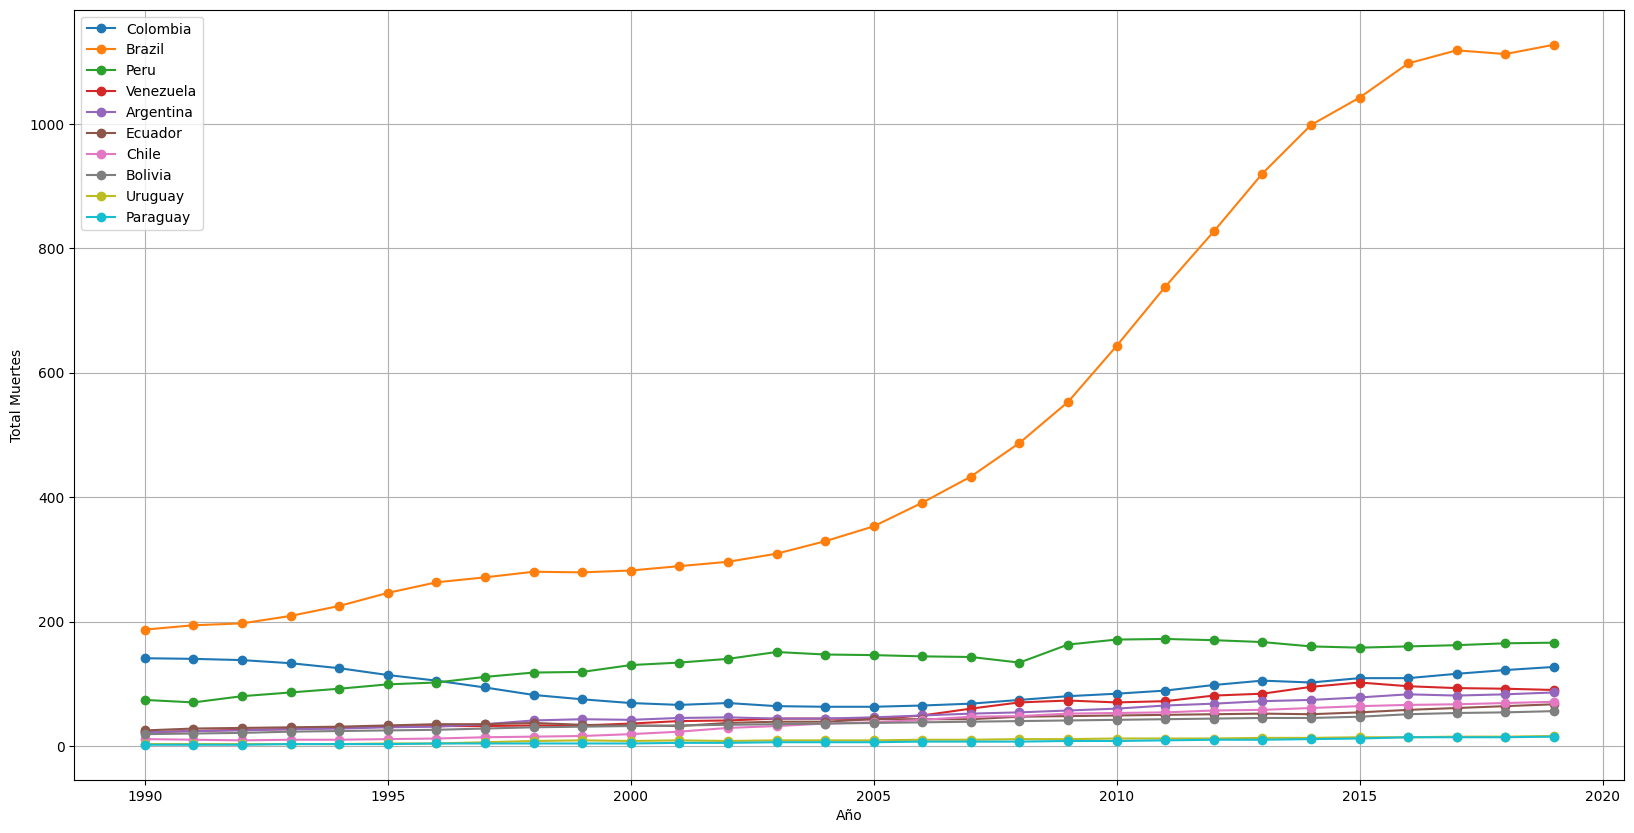

In [24]:
plt.figure(figsize=(20,10))
plt.xlabel('Año')
plt.ylabel('Total Muertes')
plt.grid()

plt.plot(df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Colombia']['año'],
         df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Colombia']['por_uso_drogas'],
         marker='o',
         label='Colombia')

plt.plot(df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Brazil']['año'],
         df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Brazil']['por_uso_drogas'],
         marker='o',
         label='Brazil')

plt.plot(df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Peru']['año'],
         df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Peru']['por_uso_drogas'],
         marker='o',
         label='Peru')

plt.plot(df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Venezuela']['año'],
         df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Venezuela']['por_uso_drogas'],
         marker='o',
         label='Venezuela')

plt.plot(df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Argentina']['año'],
         df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Argentina']['por_uso_drogas'],
         marker='o',
         label='Argentina')

plt.plot(df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Ecuador']['año'],
         df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Ecuador']['por_uso_drogas'],
         marker='o',
         label='Ecuador')

plt.plot(df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Chile']['año'],
         df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Chile']['por_uso_drogas'],
         marker='o',
         label='Chile')

plt.plot(df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Bolivia']['año'],
         df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Bolivia']['por_uso_drogas'],
         marker='o',
         label='Bolivia')

plt.plot(df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Uruguay']['año'],
         df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Uruguay']['por_uso_drogas'],
         marker='o',
         label='Uruguay')

plt.plot(df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Paraguay']['año'],
         df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Paraguay']['por_uso_drogas'],
         marker='o',
         label='Paraguay')

plt.legend()

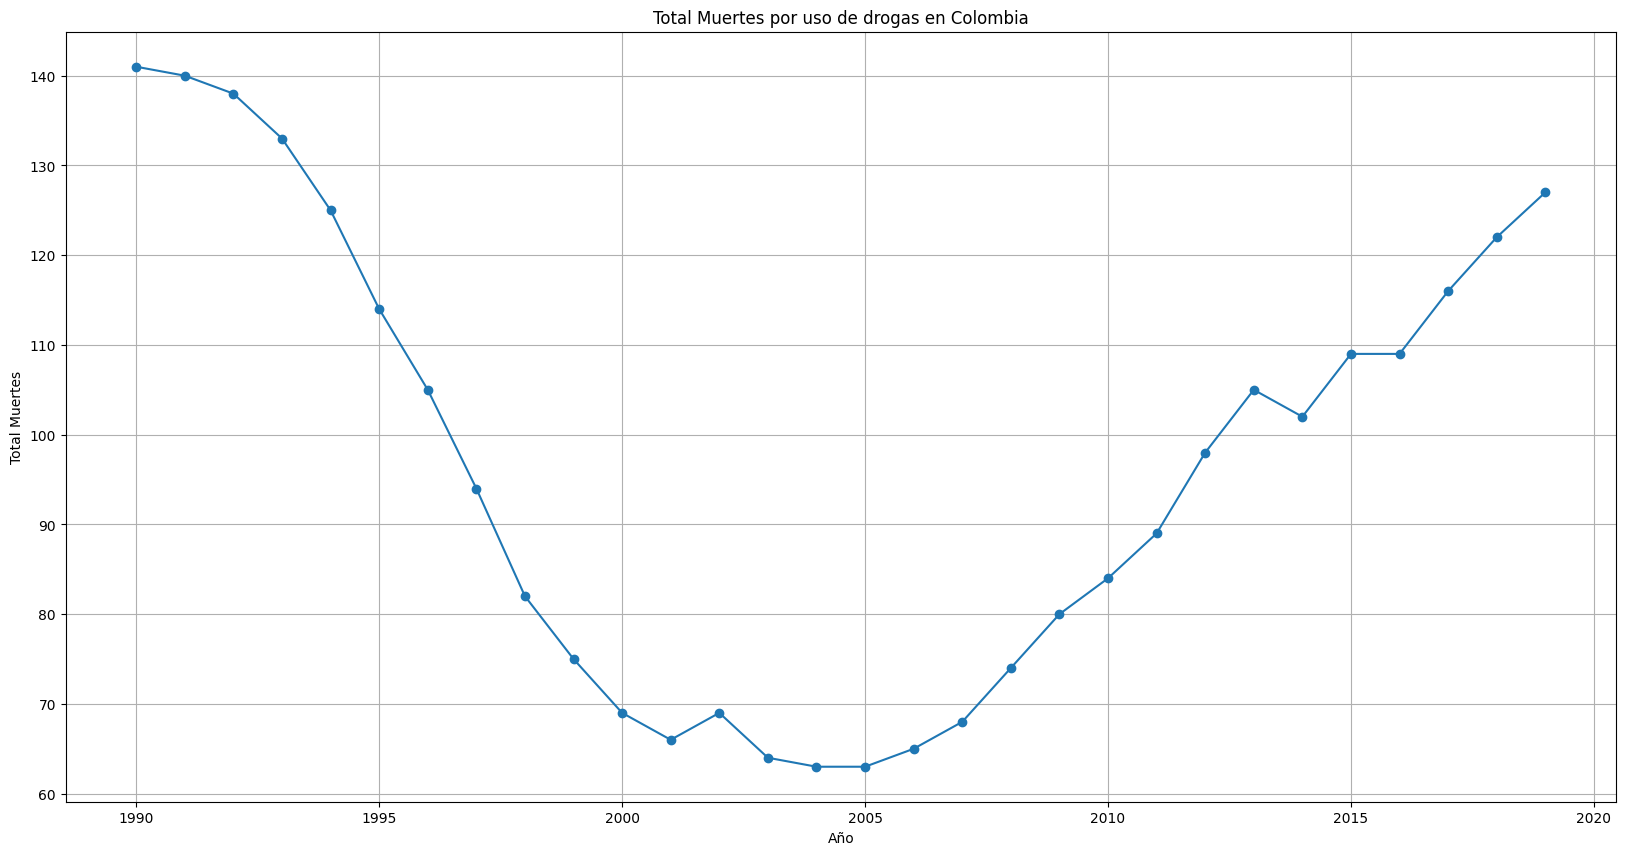

In [25]:
plt.figure(figsize=(20,10))
plt.xlabel('Año')
plt.ylabel('Total Muertes')
plt.title('Total Muertes por uso de drogas en Colombia')
plt.grid()

plt.plot(df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Colombia']['año'],
         df_muertes_drogas_x_sa[df_muertes_drogas_x_sa['pais'] == 'Colombia']['por_uso_drogas'],
         marker='o',
         label='Colombia')

# Análisis causas de muerte en Colombia

se desarrollará un analisis descriptivo de las principales causas de muerte en colombia

In [26]:
#seleccionamos solo los registros donde el pais sea colombia

df_muertes_colombia = df_causas_muertes[df_causas_muertes['pais'] == 'Colombia']

In [27]:
df_muertes_colombia.head()

,pais,codigo,año,por_meningitis,por_alzheimer,por_parkinson,por_deficiencia_nutricional,por_malaria,por_ahogo,por_violencia_interpersonal,...,por_enfermerdad_renal_cronica,por_envenenamiento,por_desnutricion,por_terrorismo,por_accidentes_de_transito,por_enfermerdades_respirtatorias_cronicas,por_enfermedades_linfaticas_cronicas,por_enfermedades_digestivas,por_sustancias_de_calor_fuego,por_hepatitis_aguda
1272,Colombia,COL,1990,1182.0,2678.0,510.0,1996.0,1245.0,1648.0,24070.0,...,3559.0,223.0,1885.0,694.0,6833.0,6211.0,2098.0,5889.0,493.0,28.0
1273,Colombia,COL,1991,1189.0,2844.0,553.0,1943.0,2013.0,1676.0,27814.0,...,3748.0,222.0,1831.0,742.0,7346.0,6704.0,2272.0,6211.0,499.0,28.0
1274,Colombia,COL,1992,1197.0,2996.0,584.0,1877.0,2271.0,1644.0,28934.0,...,3810.0,220.0,1767.0,631.0,7573.0,7076.0,2373.0,6377.0,493.0,29.0
1275,Colombia,COL,1993,1190.0,3157.0,611.0,1774.0,1303.0,1641.0,29497.0,...,3817.0,208.0,1663.0,NaN,7818.0,7333.0,2456.0,6486.0,481.0,33.0
1276,Colombia,COL,1994,1160.0,3334.0,642.0,1718.0,1007.0,1635.0,28322.0,...,3892.0,188.0,1617.0,218.0,8051.0,7680.0,2549.0,6609.0,454.0,35.0


In [28]:
#vamos a pivotar la tabla, convertiremos las columnas en filas para poder imputar mejor

df_muertes_colombia = pd.melt(df_muertes_colombia,
                              id_vars=['pais',
                                       'codigo',
                                       'año'],
                              value_vars=['por_meningitis',
                                          'por_alzheimer',
                                          'por_parkinson',
                                          'por_deficiencia_nutricional',
                                          'por_malaria',
                                          'por_ahogo',
                                          'por_violencia_interpersonal',
                                          'por_trastornos_maternos',
                                          'por_vih_sida',
                                          'por_uso_drogas',
                                          'por_tuberculosis',
                                          'por_enfermedades_cardiovasculares',
                                          'por_infecciones_respiratorias_leves',
                                          'por_trastornos_neonatales',
                                          'por_uso_alcohol',
                                          'por_autolesiones',
                                          'por_fuerzas_de_la_naturaleza',
                                          'por_enfermedades__diarreicas',
                                          'por_exposicion_al_calor_o_frio',
                                          'por_neoplasias',
                                          'por_guerras_terrorismo',
                                          'por_diabetes_mellitus',
                                          'por_enfermerdad_renal_cronica',
                                          'por_envenenamiento',
                                          'por_desnutricion',
                                          'por_terrorismo',
                                          'por_accidentes_de_transito',
                                          'por_enfermerdades_respirtatorias_cronicas',
                                          'por_enfermedades_linfaticas_cronicas',
                                          'por_enfermedades_digestivas',
                                          'por_sustancias_de_calor_fuego',
                                          'por_hepatitis_aguda'],
                              var_name='Enfermedad',
                              value_name='total_muertes')

In [29]:
df_muertes_colombia

,pais,codigo,año,Enfermedad,total_muertes
0,Colombia,COL,1990,por_meningitis,1182.0
1,Colombia,COL,1991,por_meningitis,1189.0
2,Colombia,COL,1992,por_meningitis,1197.0
3,Colombia,COL,1993,por_meningitis,1190.0
4,Colombia,COL,1994,por_meningitis,1160.0
...,...,...,...,...,...
955,Colombia,COL,2015,por_hepatitis_aguda,13.0
956,Colombia,COL,2016,por_hepatitis_aguda,13.0
957,Colombia,COL,2017,por_hepatitis_aguda,14.0
958,Colombia,COL,2018,por_hepatitis_aguda,13.0


In [31]:
#veamos el total de muertes en los dos ultimos años

df_muertes_col_last = df_muertes_colombia[df_muertes_colombia['año'].isin([2019, 2018])].sort_values('total_muertes', ascending=False)

df_muertes_col_last.head(10)

,pais,codigo,año,Enfermedad,total_muertes
359,Colombia,COL,2019,por_enfermedades_cardiovasculares,72629.0
358,Colombia,COL,2018,por_enfermedades_cardiovasculares,70281.0
599,Colombia,COL,2019,por_neoplasias,49460.0
598,Colombia,COL,2018,por_neoplasias,48033.0
839,Colombia,COL,2019,por_enfermerdades_respirtatorias_cronicas,17772.0
838,Colombia,COL,2018,por_enfermerdades_respirtatorias_cronicas,17133.0
209,Colombia,COL,2019,por_violencia_interpersonal,17061.0
208,Colombia,COL,2018,por_violencia_interpersonal,17054.0
59,Colombia,COL,2019,por_alzheimer,13672.0
58,Colombia,COL,2018,por_alzheimer,13056.0


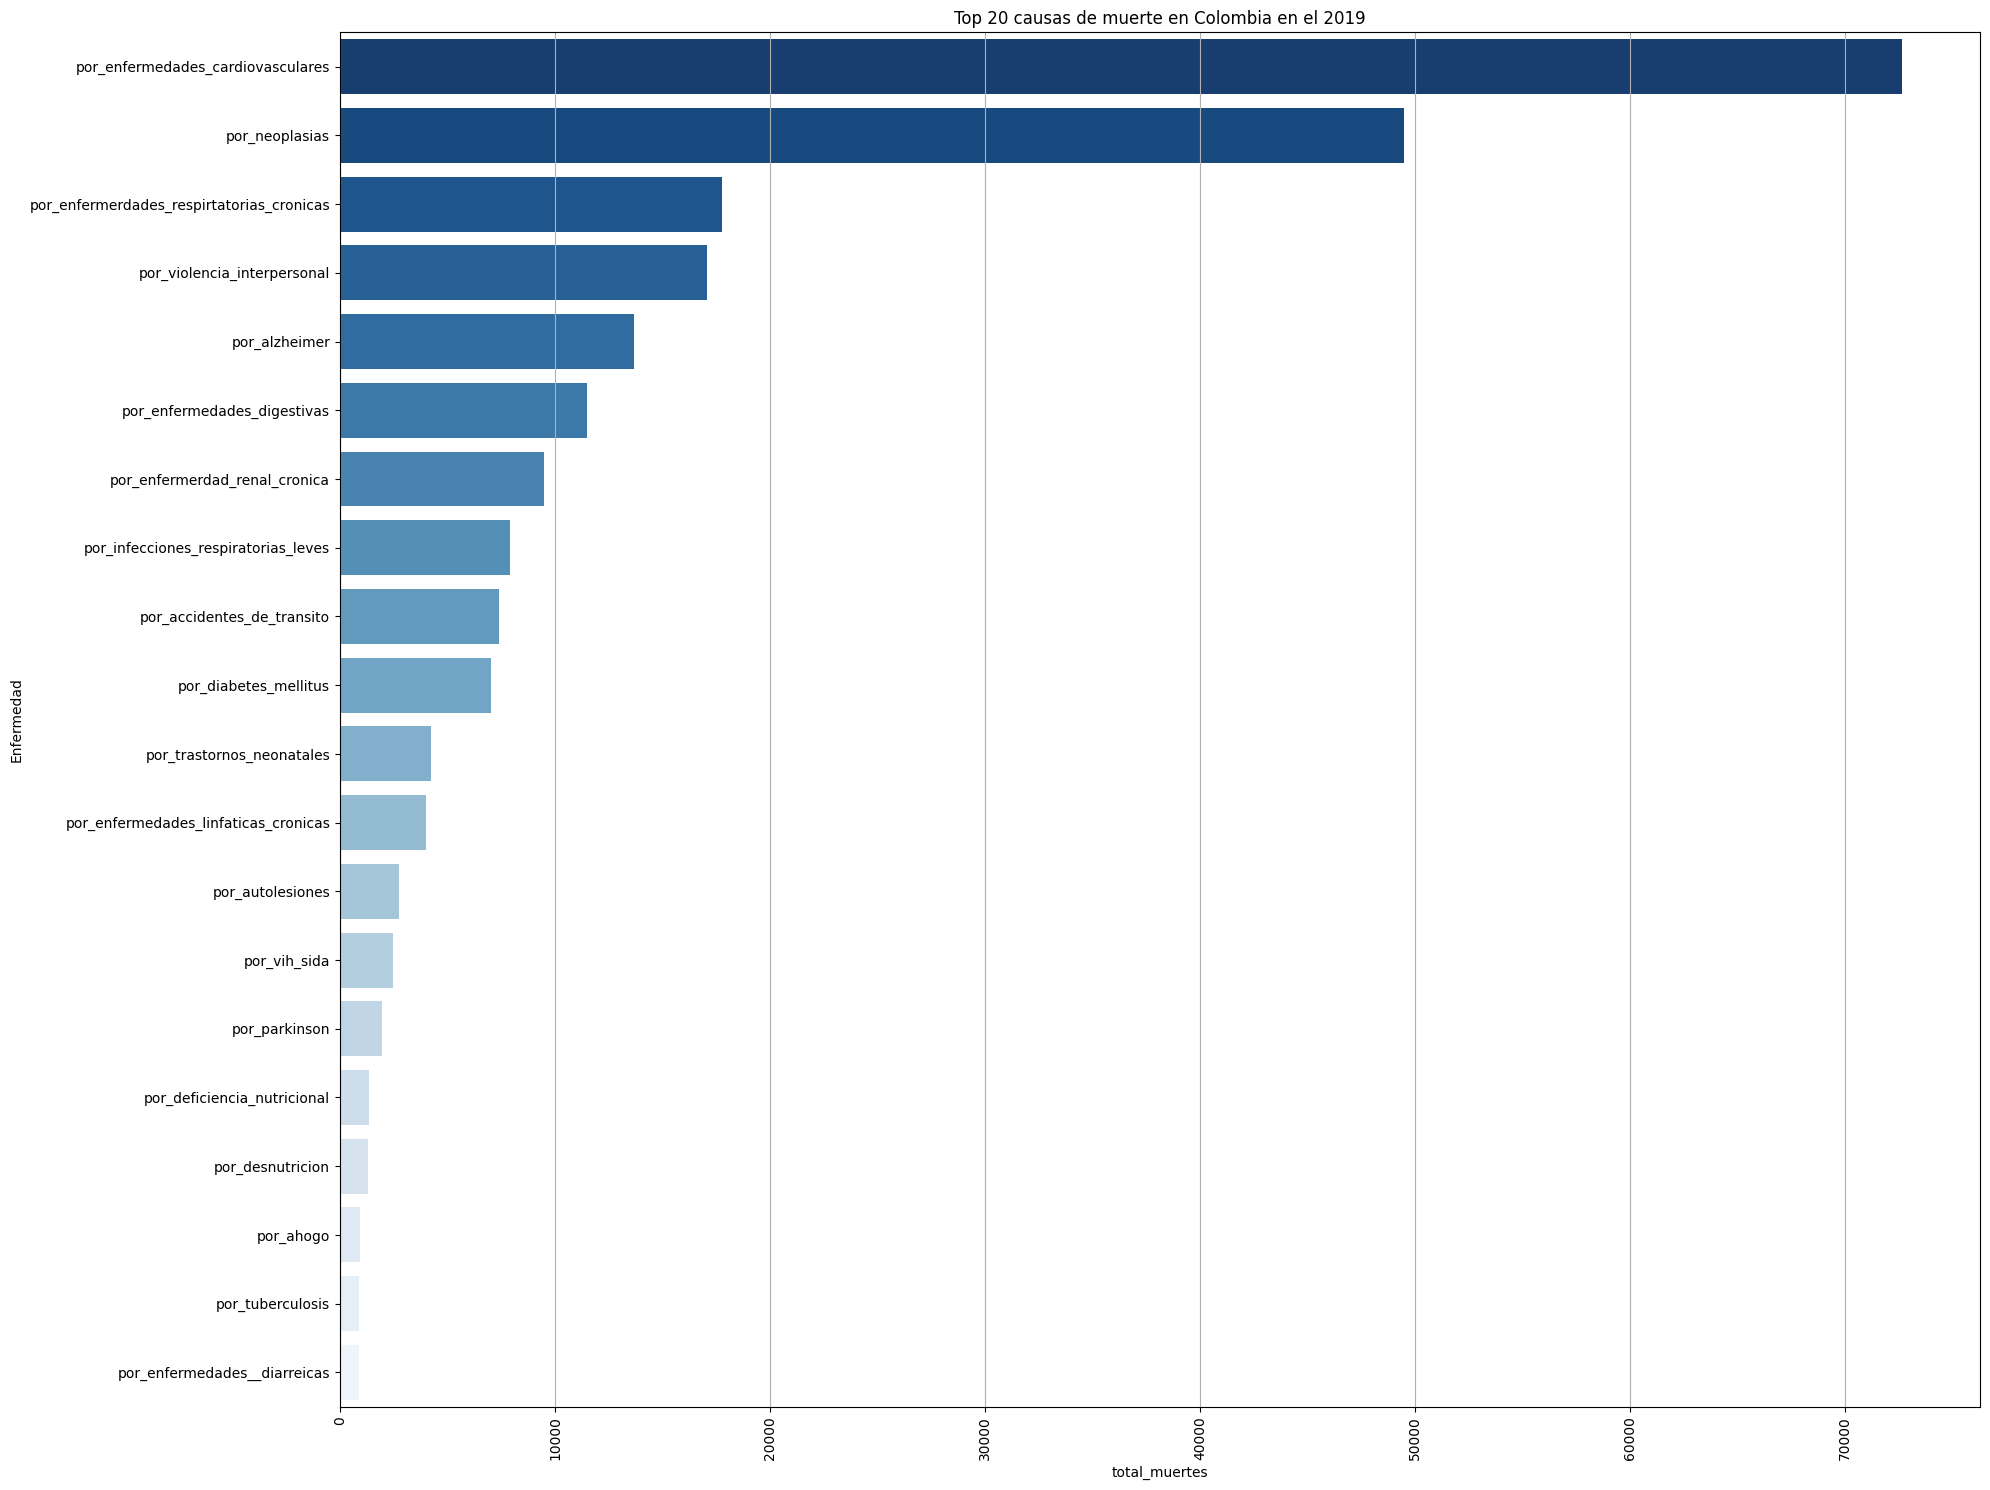

In [32]:
plt.figure(figsize=(20,15))
plt.title('Top 20 causas de muerte en Colombia en el 2019')
plt.xlabel('Enfermdad')
plt.ylabel('Total')
plt.grid()
plt.xticks(rotation=90)

sns.barplot(data=df_muertes_col_last[df_muertes_col_last['año'] == 2019].head(20),
            x='total_muertes',
            y='Enfermedad',
            orient='h',
            palette='Blues_r')

plt.tight_layout()
plt.show()

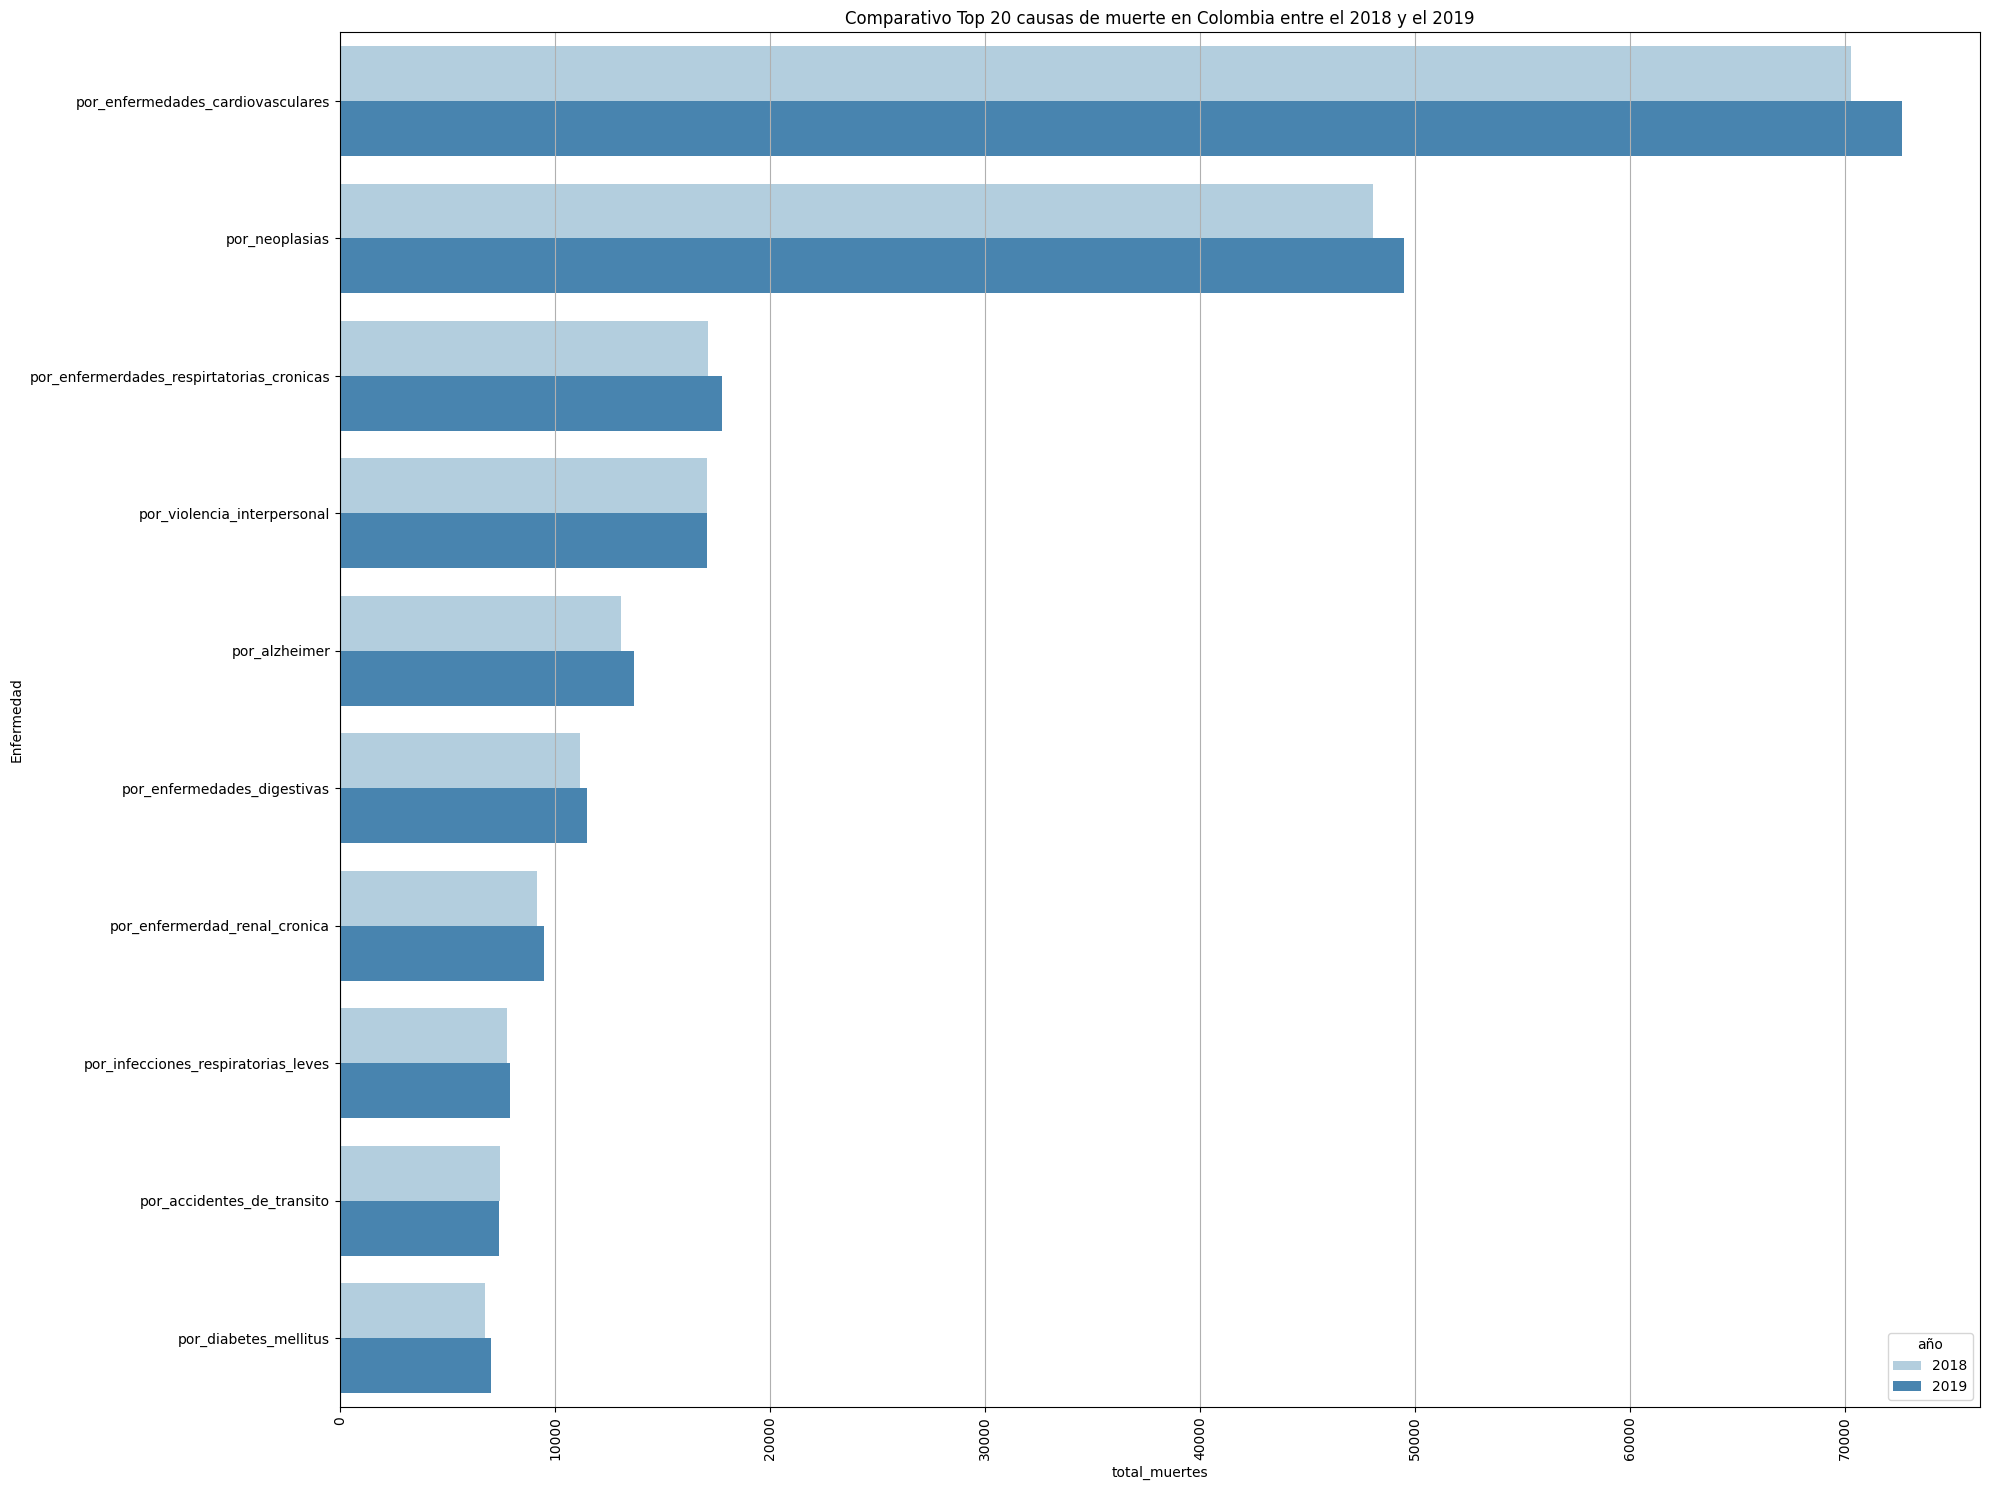

In [33]:
plt.figure(figsize=(20,15))
plt.title('Comparativo Top 20 causas de muerte en Colombia entre el 2018 y el 2019')
plt.xlabel('Enfermdad')
plt.ylabel('Total')
plt.grid()
plt.xticks(rotation=90)

sns.barplot(data=df_muertes_col_last.head(20),
            x='total_muertes',
            y='Enfermedad',
            hue='año',
            orient='h',
            palette='Blues')

plt.tight_layout()
plt.show()

In [34]:
df = df_muertes_colombia[df_muertes_colombia['Enfermedad'].isin(['por_enfermedades_cardiovasculares',
                                                                 'por_neoplasias',
                                                                 'por_enfermedades_respiratorias_cronicas',
                                                                 'por_violencia_interpersonal',
                                                                 'por_alzheimer',
                                                                 'por_diabetes_mellitus',
                                                                 'por_enfermedades_digestivas',
                                                                 'por_enfermerdad_renal_cronica',
                                                                 'por_infecciones_respiratorias_leves'])]

df

,pais,codigo,año,Enfermedad,total_muertes
30,Colombia,COL,1990,por_alzheimer,2678.0
31,Colombia,COL,1991,por_alzheimer,2844.0
32,Colombia,COL,1992,por_alzheimer,2996.0
33,Colombia,COL,1993,por_alzheimer,3157.0
34,Colombia,COL,1994,por_alzheimer,3334.0
...,...,...,...,...,...
895,Colombia,COL,2015,por_enfermedades_digestivas,10070.0
896,Colombia,COL,2016,por_enfermedades_digestivas,10419.0
897,Colombia,COL,2017,por_enfermedades_digestivas,10735.0
898,Colombia,COL,2018,por_enfermedades_digestivas,11147.0


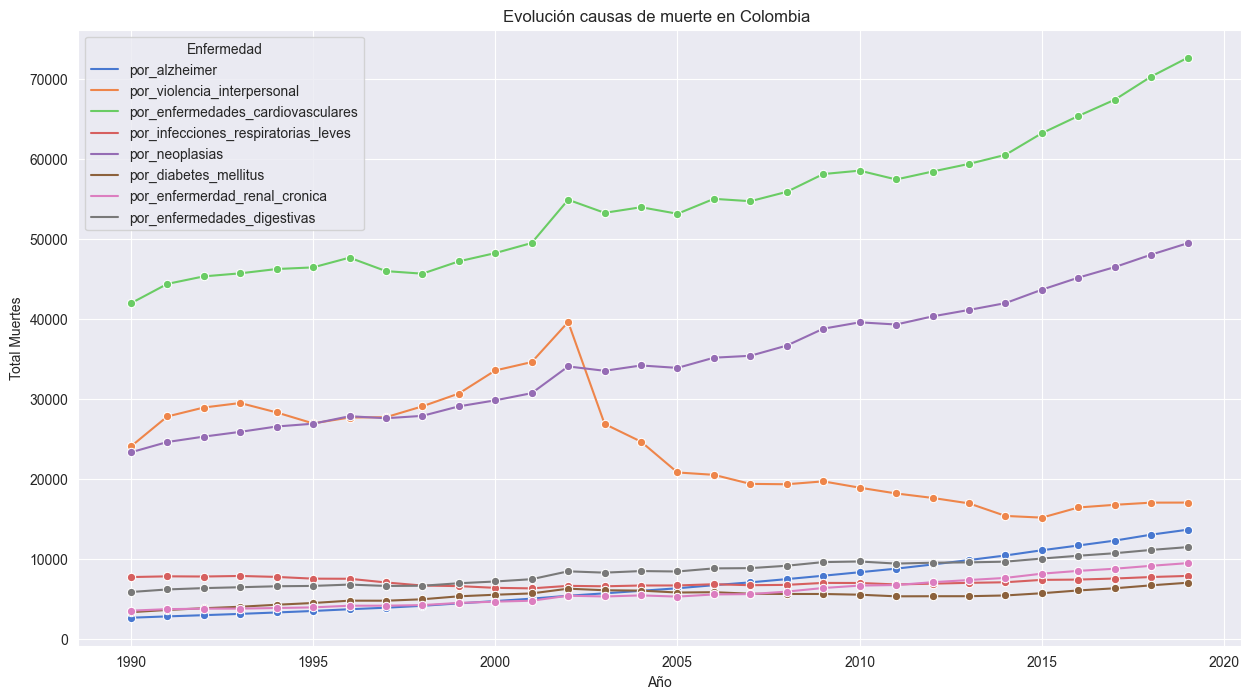

In [39]:
plt.figure(figsize=(15, 8))
plt.title('Evolución causas de muerte en Colombia ')
plt.xlabel('Año')
plt.ylabel('Total Muertes')

sns.set_style('darkgrid')
sns.lineplot(x='año',
             y='total_muertes',
             hue='Enfermedad',
             marker="o",
             palette='muted',
             data=df)

plt.show()

In [36]:
#vamos a comparar las muertes causadas por: por_vih_sida, por_uso_drogas, por_uso_alcohol, por_accidentes_de_transito